# Home Credit Default Risk - In Progress

## Background Information

Home Credit is an international finance provider funded in 1997 in Czech Republic with operation in 9 different countries. The task is to used dataset provided and predict whether or nor a client will repay a loan or have difficulty repay the loan. 


## Data Description

Data is provided by Home Credit. Data can be download at Kaggle open dataset: https://www.kaggle.com/c/home-credit-default-risk/data

The Dataset including the following source:

1. application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. 
    
    
2. bureau.csv: All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


3. bureau_balance.csv: monthly balances of previous credits in Credit Bureau.This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.


4. POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


5. credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.


6. previous_application.csv:All previous applications for Home Credit loans of clients who have loans in our sample.There is one row for each previous application related to loans in our data sample.


7. installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment.One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


8. HomeCredit_columns_description.csv:This file contains descriptions for the columns in the various data files.


![home_credit.png](image/home_credit.png)

# Import Packages and Data

In [213]:
#import packages
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')


In [214]:
# import data 
app_train = pd.read_csv("Data/application_train.csv")
app_test =pd.read_csv("Data/application_test.csv")
bureau = pd.read_csv("Data/bureau.csv")
bur_bal = pd.read_csv("Data/bureau_balance.csv")
pos_cash =pd.read_csv("Data/POS_CASH_balance.csv")
cc_balance = pd.read_csv("Data/credit_card_balance.csv")
py_bal = pd.read_csv("Data/previous_application.csv")
ins_pmt= pd.read_csv("Data/installments_payments.csv")


In [215]:
#inspect data
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [216]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [217]:
bureau.head() 

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [218]:
bur_bal.head() 

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [219]:
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [220]:
cc_balance.head() 

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [221]:
py_bal.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
ins_pmt.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Data Cleaning

## Combining training and testing

Before we cleaning the data we need to combine training and testing so that the data cleaning process can apply to both data set for consistent

In [223]:
# Checking whether training and testing have same columns
app_train.columns.isin(app_test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [224]:
print(app_train.columns[1])

print(f'Number of columns in training set', len(app_train.columns))
print(f'Number of columns in testing set', len(app_test.columns))

TARGET
Number of columns in training set 122
Number of columns in testing set 121


Looks like the columns in training and testing are the same except the target column. Therefore, I will add a 'Target' column in the testing set

In [225]:
#add empty column Target into the app_test
app_test['TARGET']=np.nan

#sanity check
print(app_train.columns.isin(app_test.columns))

print(f'Number of columns in training set', len(app_train.columns))
print(f'Number of columns in testing set', len(app_test.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Number of columns in training set 122
Number of columns in testing set 122


In [226]:
#Combining dataset

df = pd.concat([app_train,app_test])

#sanity check
print(f'Shape of App_train:', app_train.shape)
print(f'Shape of app_test:', app_test.shape)
print(f'Shape of df:', df.shape)

Shape of App_train: (307511, 122)
Shape of app_test: (48744, 122)
Shape of df: (356255, 122)


In [227]:
# Check df info
df.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 122 columns):
AMT_ANNUITY                     356219 non-null float64
AMT_CREDIT                      356255 non-null float64
AMT_GOODS_PRICE                 355977 non-null float64
AMT_INCOME_TOTAL                356255 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_MON       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT       308687 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR      308687 non-null float64
APARTMENTS_AVG                  176307 non-null float64
APARTMENTS_MEDI                 176307 non-null float64
APARTMENTS_MODE                 176307 non-null float64
BASEMENTAREA_AVG                148671 non-null float64
BASEMENTAREA_MEDI               148671 non-null float64
BASEMENTAREA_MODE               148671 non-null f

## Missing data

In [228]:
#check on the missing data for app_train
total_miss = df.isnull().sum().sort_values(ascending=False)
miss_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
miss_summ = pd.concat([total_miss, miss_percent], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ

,Total Missing,Missing Percent
COMMONAREA_MODE,248360,69.714109
COMMONAREA_AVG,248360,69.714109
COMMONAREA_MEDI,248360,69.714109
NONLIVINGAPARTMENTS_MODE,246861,69.293343
NONLIVINGAPARTMENTS_AVG,246861,69.293343
NONLIVINGAPARTMENTS_MEDI,246861,69.293343
FONDKAPREMONT_MODE,243092,68.235393
LIVINGAPARTMENTS_AVG,242979,68.203674
LIVINGAPARTMENTS_MEDI,242979,68.203674
LIVINGAPARTMENTS_MODE,242979,68.203674


#### Current living area measurement
Based on above missing data summary app_train, we can see that most of the missing columns involved missing information about their current living area measurement. People failed to put this information maybe simply due to they do not know what are the exact measurement of their current living places, especially to each floor, living area, non-living area.  For the purpose of this prediction, I assume the current detailed living area has no impact on whether or not the client can repay the loan. Therefore, I will delete those columns related to detailed measurement of current living places.  

In [229]:
# check the index names related to current living area detailed measurement in miss_summ. Based on the miss_summ 
# all of the measurement are missing more than 40%
miss_summ[miss_summ['Missing Percent']>40].index


Index(['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE',
       'EMERGE

In [230]:
# Delete the columns related to current living area detailed measurement. 
df1 = df.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
                             'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 
                             'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 
                             'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 
                             'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 
                             'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 
                             'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 
                             'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 
                             'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 
                             'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 
                             'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 
                             'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE','EMERGENCYSTATE_MODE'], axis=1)

In [231]:
#recheck the missing data summary
total_miss1 = df1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
EXT_SOURCE_1,193910,54.430113
OCCUPATION_TYPE,111996,31.437032
EXT_SOURCE_3,69633,19.545831
TARGET,48744,13.682334
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.352234
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_MON,47568,13.352234
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.352234
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.352234


#### Ext_source_1, 2 & 3

Ext_Source_1, 2 and 3 are the normalized scores from external source. Most likely these three scores are some kind of credit report for the applicant. Since they are the external measurement of the applicant, they are crucial parts of the data. Therefore, we will examine the data and fill in the missing value. Based on the histograms below, it seems the Ext_source_1 is normally distributed, while Ext_source_2 and Ext_source_3 are skewed to the left. The distribution of Ext_source_2 and Ext_source_3 are similar and they are different than Ext_source_1. 


In [232]:
#Check the summary stats for ext_source_1
df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,162345.000000,3.555870e+05,286622.000000
mean,0.501965,5.148900e-01,0.509350
std,0.210045,1.897531e-01,0.194141
min,0.013458,8.173617e-08,0.000527
25%,0.335503,3.949551e-01,0.368969
50%,0.506155,5.648491e-01,0.533482
75%,0.673344,6.629285e-01,0.665855
max,0.962693,8.549997e-01,0.896010


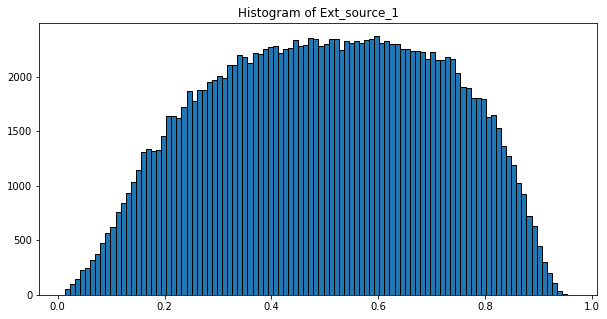

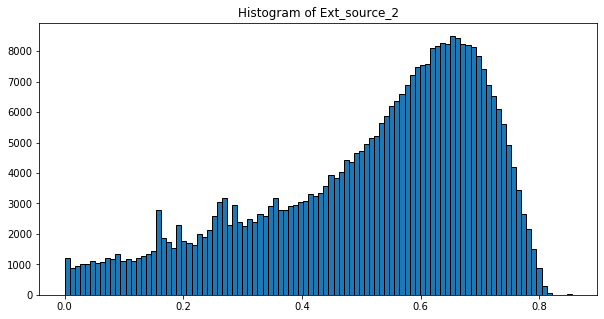

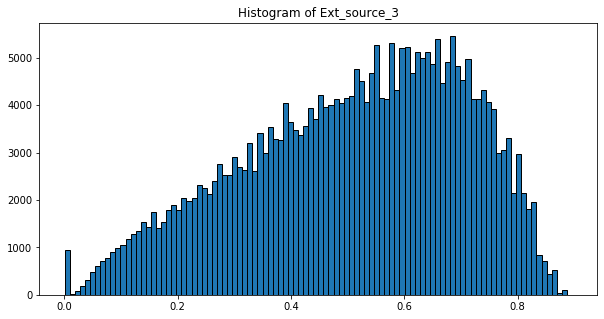

In [233]:
#Plot out the distribution for EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3
plt.figure(figsize =(10,5))
plt.hist(df1['EXT_SOURCE_1'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_1")

plt.figure(figsize=(10,5))
plt.hist(df1['EXT_SOURCE_2'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_2")

plt.figure(figsize=(10,5))
plt.hist(df1['EXT_SOURCE_3'], edgecolor='black', bins = 100)
plt.title("Histogram of Ext_source_3")


plt.show()

For missing data in the ext_source_1, 2, and 3, it would be a good idea to use regression to impute the missing data. However, we need to test whether there will be any correlation between each of the external source and the correlation of each external source vs all other columns. However, based on the correlation test below, each of the external source has no strong statistical correlation with each other. Also each of the external source has no strong statistical correlation with all other columns. Using regression to impute missing data will impose bias on the predicted values. Therefore, I will impute the missing values of Ext_source_1 with mean and missing values of Ext_source_2, Ext_source_3 with the median of each columns.   

In [234]:
#Check on the correlation of the three score
df1[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.212987,0.18139
EXT_SOURCE_2,0.212987,1.000000,0.10848
EXT_SOURCE_3,0.181390,0.108480,1.00000


In [235]:
#Correlation of EXT_SOURCE_1 and all other columns
df1.corr()['EXT_SOURCE_1'].sort_values(ascending=False)

EXT_SOURCE_1                   1.000000
DAYS_EMPLOYED                  0.280783
EXT_SOURCE_2                   0.212987
FLAG_DOCUMENT_6                0.184286
EXT_SOURCE_3                   0.181390
AMT_GOODS_PRICE                0.177335
AMT_CREDIT                     0.171269
AMT_ANNUITY                    0.115974
REGION_POPULATION_RELATIVE     0.098891
FLAG_PHONE                     0.082056
HOUR_APPR_PROCESS_START        0.032901
AMT_INCOME_TOTAL               0.028852
AMT_REQ_CREDIT_BUREAU_MON      0.027661
FLAG_DOCUMENT_9                0.013570
FLAG_EMAIL                     0.012511
AMT_REQ_CREDIT_BUREAU_YEAR     0.008858
FLAG_DOCUMENT_14               0.008802
FLAG_DOCUMENT_19               0.004704
FLAG_DOCUMENT_7                0.003753
FLAG_DOCUMENT_4                0.003155
FLAG_DOCUMENT_15               0.002677
FLAG_DOCUMENT_10               0.002336
FLAG_DOCUMENT_12               0.001571
FLAG_CONT_MOBILE               0.001560
FLAG_DOCUMENT_2                0.001087


In [236]:
#Correlation of EXT_SOURCE_2 and all other columns
df1.corr()['EXT_SOURCE_2'].sort_values(ascending=False)

EXT_SOURCE_2                   1.000000
EXT_SOURCE_1                   0.212987
REGION_POPULATION_RELATIVE     0.201630
HOUR_APPR_PROCESS_START        0.156814
AMT_GOODS_PRICE                0.137816
AMT_CREDIT                     0.130024
AMT_ANNUITY                    0.124447
EXT_SOURCE_3                   0.108480
AMT_INCOME_TOTAL               0.065222
FLAG_PHONE                     0.062979
FLAG_DOCUMENT_8                0.049692
AMT_REQ_CREDIT_BUREAU_MON      0.047439
LIVE_REGION_NOT_WORK_REGION    0.032252
REG_REGION_NOT_WORK_REGION     0.031570
FLAG_EMAIL                     0.022531
FLAG_DOCUMENT_13               0.022105
FLAG_DOCUMENT_14               0.019531
FLAG_EMP_PHONE                 0.017024
REG_REGION_NOT_LIVE_REGION     0.016897
FLAG_DOCUMENT_9                0.015941
FLAG_DOCUMENT_16               0.011935
FLAG_DOCUMENT_15               0.007788
FLAG_DOCUMENT_5                0.005252
FLAG_DOCUMENT_19               0.002986
FLAG_DOCUMENT_4                0.002692


In [237]:
#Correlation of EXT_SOURCE_3 and all other columns
df1.corr()['EXT_SOURCE_3'].sort_values(ascending=False)

EXT_SOURCE_3                   1.000000
EXT_SOURCE_1                   0.181390
DAYS_EMPLOYED                  0.111687
EXT_SOURCE_2                   0.108480
FLAG_DOCUMENT_6                0.073932
AMT_GOODS_PRICE                0.046506
AMT_CREDIT                     0.042806
AMT_ANNUITY                    0.025882
FLAG_CONT_MOBILE               0.008982
FLAG_DOCUMENT_16               0.003036
FLAG_DOCUMENT_4                0.002622
FLAG_MOBIL                     0.002377
FLAG_PHONE                     0.002278
SK_ID_CURR                     0.001494
FLAG_DOCUMENT_17               0.001241
FLAG_DOCUMENT_12               0.001101
FLAG_DOCUMENT_15               0.001040
FLAG_DOCUMENT_13               0.000862
FLAG_DOCUMENT_7                0.000060
OBS_30_CNT_SOCIAL_CIRCLE      -0.000058
OBS_60_CNT_SOCIAL_CIRCLE      -0.000287
FLAG_DOCUMENT_14              -0.000847
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001419
FLAG_DOCUMENT_19              -0.002231
FLAG_DOCUMENT_10              -0.003640


In [238]:
# Fill NA for Ext_source_1 with mean
df1['EXT_SOURCE_1']= df1['EXT_SOURCE_1'].fillna(df1['EXT_SOURCE_1'].mean(), axis=0).values


#sanity check 
df1['EXT_SOURCE_1'].isnull().sum()

0

In [239]:
# Fill NA for EXT_source_2 with median
df1['EXT_SOURCE_2']= df1['EXT_SOURCE_2'].fillna(df1['EXT_SOURCE_2'].median(), axis=0).values


#Sanity check 
df1['EXT_SOURCE_2'].isnull().sum()

0

In [240]:
# Fill NA for EXT_source_3 with median
df1['EXT_SOURCE_3']= df1['EXT_SOURCE_3'].fillna(df1['EXT_SOURCE_3'].median(), axis=0).values


#Sanity check 
df1['EXT_SOURCE_3'].isnull().sum()

0

In [241]:
#Perform the exact same method for Ext_source 1, 2, 3 in test data

#Check the missing data for EXT_SOURCE 1,2,3 in app_test 1
df1[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

For the next section, I will combine the train and test data together for easier cleaning data. After clean the data i will separate out the train vs test data. 

In [242]:
#recheck the missing data summary
total_miss1 = df1.isnull().sum().sort_values(ascending=False)
miss_percent1 = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
miss_summ1 = pd.concat([total_miss1, miss_percent1], axis=1, keys=['Total Missing','Missing Percent'])
miss_summ1[miss_summ1['Missing Percent']>0]

,Total Missing,Missing Percent
OCCUPATION_TYPE,111996,31.437032
TARGET,48744,13.682334
AMT_REQ_CREDIT_BUREAU_DAY,47568,13.352234
AMT_REQ_CREDIT_BUREAU_HOUR,47568,13.352234
AMT_REQ_CREDIT_BUREAU_MON,47568,13.352234
AMT_REQ_CREDIT_BUREAU_QRT,47568,13.352234
AMT_REQ_CREDIT_BUREAU_WEEK,47568,13.352234
AMT_REQ_CREDIT_BUREAU_YEAR,47568,13.352234
NAME_TYPE_SUITE,2203,0.618377
OBS_30_CNT_SOCIAL_CIRCLE,1050,0.294733


### Occupation type

Another significant missing data is occupation type. Lets check the number of different occupation count and the percentage of each occupation. 

In [243]:
#Check the distribution of Occupation type
occupation_count = df1['OCCUPATION_TYPE'].value_counts()
occupation_percent = (df1['OCCUPATION_TYPE'].value_counts()/df1['OCCUPATION_TYPE'].count())*100
occupation_summary = pd.concat([occupation_count, occupation_percent], axis=1, keys =['Occupation Count', 'Occupation Percentage'])
occupation_summary

,Occupation Count,Occupation Percentage
Laborers,63841,26.136601
Sales staff,37174,15.219091
Core staff,31931,13.072599
Managers,24945,10.212520
Drivers,21376,8.751366
High skill tech staff,13234,5.418019
Accountants,11441,4.683963
Medicine staff,9853,4.033833
Security staff,7636,3.126190
Cooking staff,6840,2.800306


Based on the occupation count, we can combine the type of occupation into following four categories: Laborers, Sales Staff, Core Staff, and Managers. Merged other occupation into the four categories based on the name of the occupation, since other occupations have less than 10% of the total data.

Laborers include: Drivers, Security Staff, Cooking staff, Cleaning Staff, Low-skill laborers,Waiters/barmen staff, Private service staff

Sales staff include:Realty Agents

Core staff include: High skill tech staff, accountants, Medicine staff, Secretaries, HR staff, IT staff


In [183]:
#Get the occupation summary index
occupation_summary.index

Index(['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff'], dtype='object')

In [244]:
#Recategorized laborers category based on the description
#Laborers include: Drivers, Security Staff, Cooking staff, Cleaning Staff, 
#Low-skill laborers,Waiters/barmen staff, Private service staff

df1.loc[df1['OCCUPATION_TYPE'].isin(['Drivers', 'Security staff','Cooking staff','Cleaning staff', 
                                                   'Private service staff', 'Low-skill Laborers', 
                                                   'Waiters/barmen staff']), 'OCCUPATION_TYPE']='Laborers'


#Recategorized Sales staff to include:Realty Agents
df1.loc[df1['OCCUPATION_TYPE'].isin(['Realty agents']),'OCCUPATION_TYPE']='Sales staff'

#Recategorized Core staff to include: High skill tech staff, accountants, Medicine staff, Secretaries, HR staff, IT staff
df1.loc[df1['OCCUPATION_TYPE'].isin(['High skill tech staff', 'Accountants', 'Medicine staff', 'Secretaries',
                                                   'HR staff', 'IT staff']),'OCCUPATION_TYPE']='Core staff'


In [246]:
#Re-Check the distribution of Occupation type
occupation_count = df1['OCCUPATION_TYPE'].value_counts()
occupation_percent = (df1['OCCUPATION_TYPE'].value_counts()/df1['OCCUPATION_TYPE'].count())
occupation_summary = pd.concat([occupation_count, occupation_percent], axis=1, keys =['Occupation Count', 'Occupation Distribution'])
occupation_summary

,Occupation Count,Occupation Distribution
Laborers,112000,0.458530
Core staff,69251,0.283515
Sales staff,38063,0.155830
Managers,24945,0.102125


After recategorized the occupation type, there are still 111K of records still missing occupation. I assume the missing occupation type is missing at random, therefore fill in the missing values based on above distributions. 


In [247]:
#Parse out the occupation missing rows to create a new df
occ_missing = df1[df1['OCCUPATION_TYPE'].isnull()]

In [250]:
#split the occ_missing by percentage of the occupation distribution
a,b,c,d = np.split(occ_missing, [int(0.458530*len(occ_missing)), ])

In [251]:
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)
print(occ_missing.shape)

(51353, 74)
(0, 74)
(0, 74)
(100559, 74)
(111996, 74)


In [189]:
#Fill df a missing occupation to Laborers
a['OCCUPATION_TYPE'] = a['OCCUPATION_TYPE'].fillna('Laborers', axis=0)

#Fill df b missing occupation to Core staff
b['OCCUPATION_TYPE'] = b['OCCUPATION_TYPE'].fillna('Core staff', axis=0)

#Fill df c missing occupation to Sales staff
c['OCCUPATION_TYPE'] = c['OCCUPATION_TYPE'].fillna('Sales staff', axis=0)

#Fill df d missing occupation to Managers
d['OCCUPATION_TYPE'] = d['OCCUPATION_TYPE'].fillna('Managers', axis=0)

#Sanity check 
print(a['OCCUPATION_TYPE'].value_counts())
print(b['OCCUPATION_TYPE'].value_counts())
print(c['OCCUPATION_TYPE'].value_counts())
print(d['OCCUPATION_TYPE'].value_counts())

Laborers    59413
Name: OCCUPATION_TYPE, dtype: int64
Series([], Name: OCCUPATION_TYPE, dtype: int64)
Series([], Name: OCCUPATION_TYPE, dtype: int64)
Managers    91804
Name: OCCUPATION_TYPE, dtype: int64


# To Be Continued. 